In [14]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

stopwords = set(STOPWORDS)
with open("data/stopwords.txt") as swfile:
    german_stopwords = swfile.read().splitlines()
for word in german_stopwords:
    stopwords.add(word)

In [15]:
df = pd.read_csv("data/corner_2019.csv")
df = df.dropna().drop("Unnamed: 0", axis=1)
df.index = pd.to_datetime(df.date)
df = df.drop("date", axis=1)
df.head()


,name,text
date,,
2019-12-20 18:03:34+00:00,Niklas,Geilo
2019-12-20 18:02:14+00:00,John,Ai!
2019-12-20 17:59:35+00:00,Felix,😳
2019-12-20 17:52:53+00:00,Artem,Warten auf Gandalf
2019-12-20 17:51:07+00:00,Frederik,Sinnlos in mittelerde


In [16]:
s = df['text'].str.split(' ').apply(pd.Series, 1).stack()

In [ ]:
wc = WordCloud(background_color="white")

s = df['text'].str.split(' ').apply(pd.Series, 1).stack()
wc.generate(" ".join(s.values))

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("results/wordcloud.png")

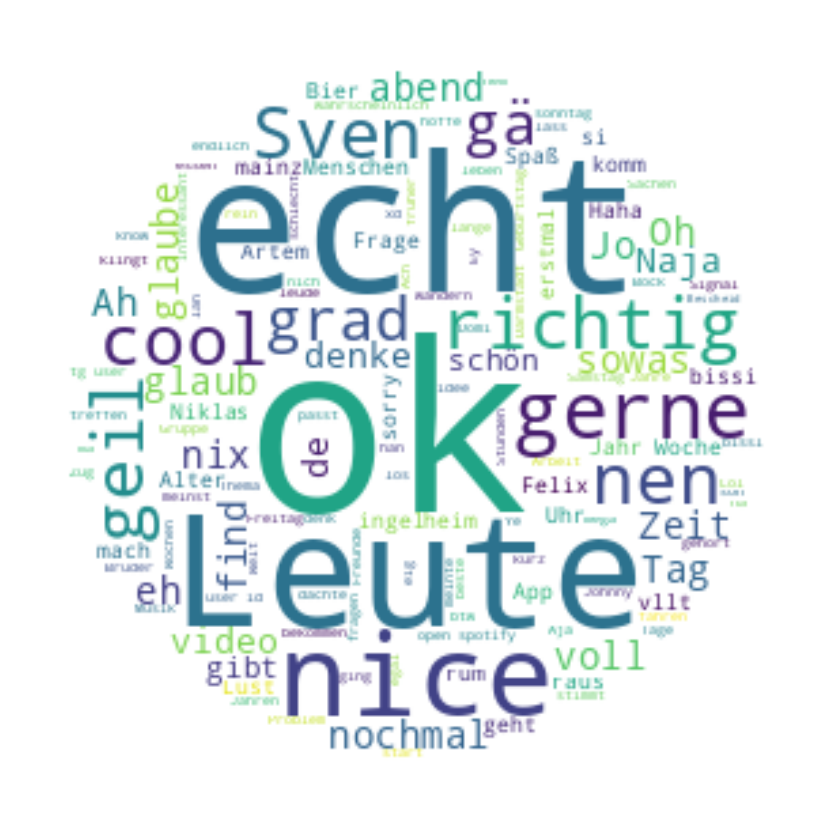

In [17]:
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=stopwords)

s = df['text'].str.split(' ').apply(pd.Series, 1).stack()
wc.generate(" ".join(s.values))

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("results/wordcloud.png")

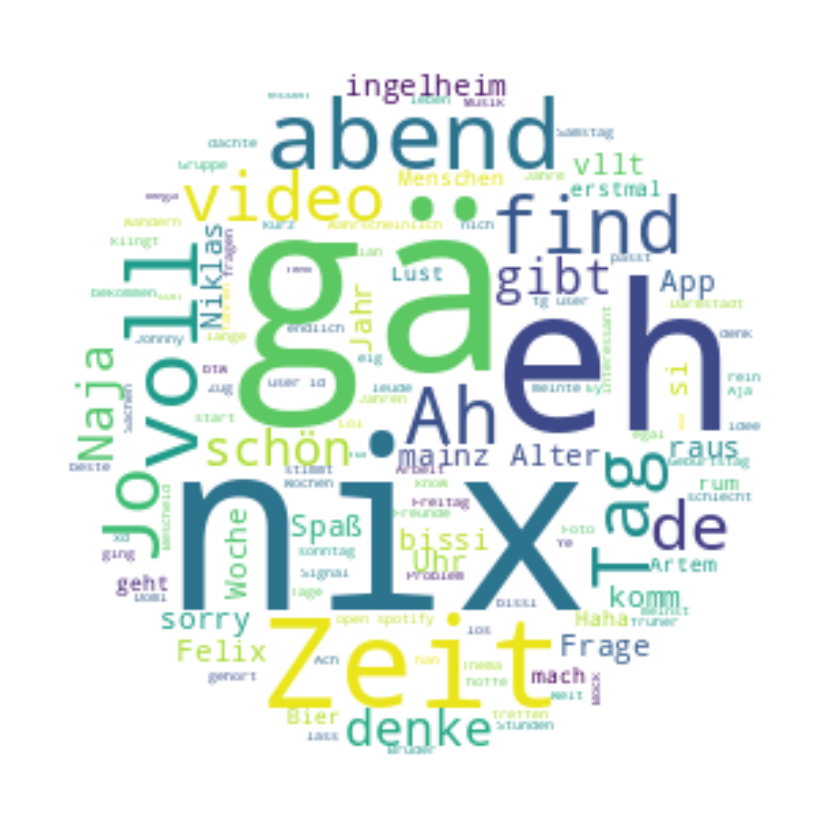

In [18]:
with open("data/additional-stopwords.txt") as swfile:
    additional_stopwords = swfile.read().splitlines()

for word in additional_stopwords:
    stopwords.add(word)
    
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=stopwords)
wc.generate(" ".join(s.values))

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("results/wordcloud-2.png")